# UV map
- nii to vtk
    - nii2mesh
- vtk to obj
    - https://imagetostl.com/convert/file/vtk/to/obj
- UV map is computed from UV-mapper
    - https://www.uvmapper.com/downloads.html

# Common Libraries

In [7]:
import trimesh
import os
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go

# Custom Libraries

In [11]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")

from plot_3d import show_non_interactive_mesh, draw_uv_map, show_mesh, show_interactive_mesh
from sj_image_process import find_connected_components_faces
from sj_math import projection

# Constants

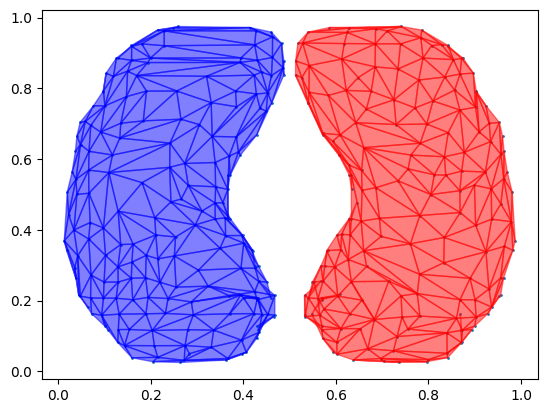

In [9]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask"
lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus_afterUVmap_planarZ.obj")
rt_hippo_path = os.path.join(mask_dir_path, "rt_hippocampus_afterUVmap_planarZ.obj")

# Load the OBJ file
mesh = trimesh.load(lt_hippo_path)
uv_coordinates = mesh.visual.uv
RASp_coord_vertices = mesh.vertices
faces = mesh.faces

# Find components
first_components = find_connected_components_faces(faces = mesh.faces)[0]
second_components = find_connected_components_faces(faces = mesh.faces)[1]
highlight_face_info = {
    "first" : {
        "data" : first_components,
        "color" : "red",
    },
    "second" : {
        "data" : second_components,
        "color" : "blue",
    },
}
draw_uv_map(uv_coordinates, faces, highlight_face_info = highlight_face_info)

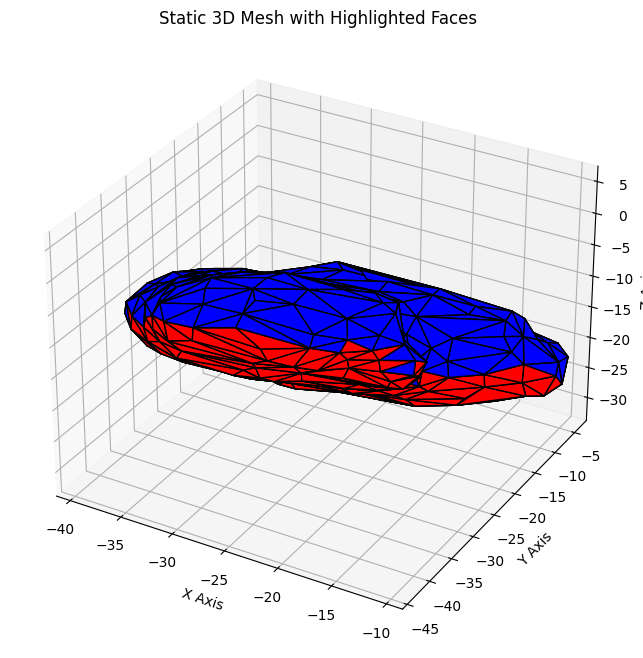

In [10]:
fig, ax = show_non_interactive_mesh(mesh.vertices, 
                                    faces, 
                                    highlight_face_info = highlight_face_info)
fig.set_figwidth(10)
fig.set_figheight(15)
ax.set_xlabel("R+")
ax.set_ylabel("A+")
ax.set_zlabel("S+")
fig.tight_layout()
plt.show()

In [12]:
show_interactive_mesh(mesh.vertices, 
                      faces, 
                      highlight_face_info = highlight_face_info)

<function plot_3d.show_interactive_mesh(vertices, faces, highlight_face_info={})>

# Anterior-posterior

In [14]:
from_ = np.array([0.5, 1.0])
to_ = np.array([0.5, 0])

scalar, prj_vec = projection(uv_coordinates, on_vector = to_ - from_)

is_up = scalar < -0.5
up_vertex_indexes = np.where(is_up)[0]
down_vertex_indexes = np.where(np.logical_not(is_up))[0]

plt.scatter(uv_coordinates[up_vertex_indexes][:,0], uv_coordinates[up_vertex_indexes][:,1])
plt.scatter(uv_coordinates[down_vertex_indexes][:,0], uv_coordinates[down_vertex_indexes][:,1])

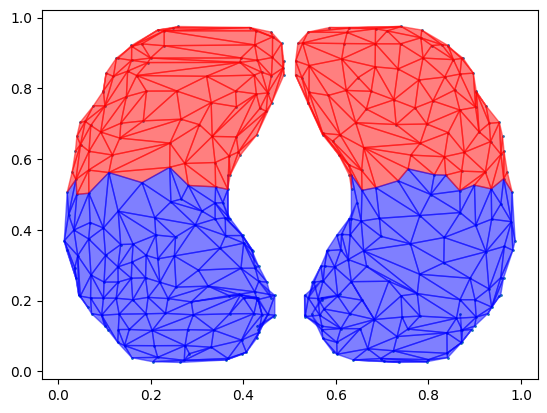

In [70]:
highlight_face_indexes = np.alltrue(np.isin(faces, up_vertex_indexes), axis = 1)
highlight_face_info = {
    "first" : {
        "data" : np.where(highlight_face_indexes)[0],
        "color" : "red",
    },
    "second" : {
        "data" : np.where(np.logical_not(highlight_face_indexes))[0],
        "color" : "blue",
    },
}
draw_uv_map(uv_coordinates, faces, highlight_face_info = highlight_face_info)

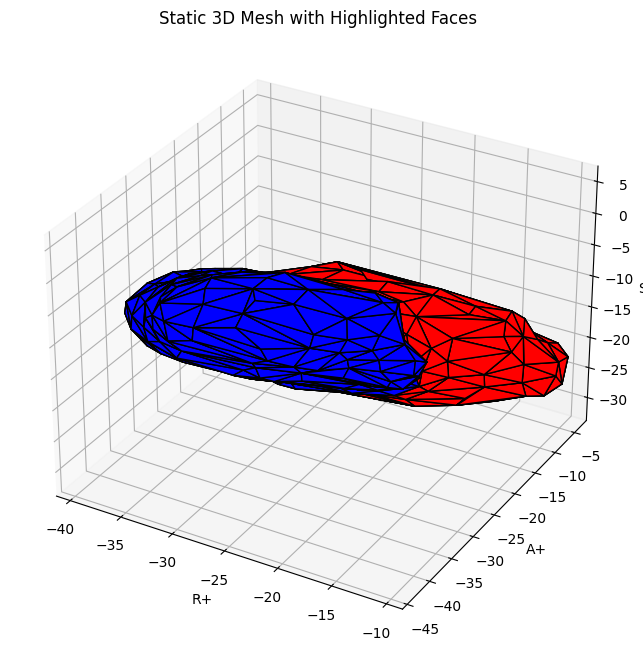

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Static 3D Mesh with Highlighted Faces'}, xlabel='R+', ylabel='A+', zlabel='S+'>)

In [92]:
show_mesh(RASp_coord_vertices, 
          faces, 
          vertex_index_info = {
    "a" : {
        "set" : faces[highlight_face_indexes].reshape(-1),
        "color" : "red",
    },
    "b" : {
        "set" : faces[np.logical_not(highlight_face_indexes)].reshape(-1),
        "color" : "blue",
    }
})

# Left-Right

In [105]:
left_vertex_indexes

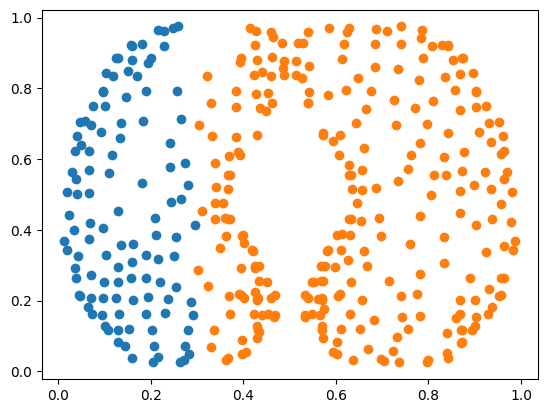

In [106]:
from_ = np.array([0, 0])
to_ = np.array([1, 0])

scalar, prj_vec = projection(uv_coordinates, on_vector = to_ - from_)

is_left = scalar < 0.3
left_vertex_indexes = np.where(is_left)[0]
right_vertex_indexes = np.where(np.logical_not(is_left))[0]

plt.scatter(uv_coordinates[up_vertex_indexes][:,0], uv_coordinates[up_vertex_indexes][:,1])
plt.scatter(uv_coordinates[right_vertex_indexes][:,0], uv_coordinates[right_vertex_indexes][:,1])

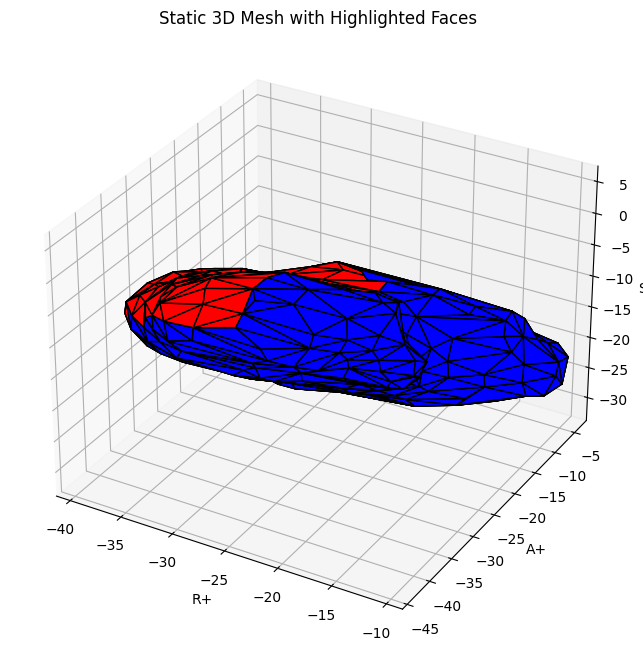

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Static 3D Mesh with Highlighted Faces'}, xlabel='R+', ylabel='A+', zlabel='S+'>)

In [107]:
highlight_face_indexes = np.alltrue(np.isin(faces, left_vertex_indexes), axis = 1)
show_mesh(RASp_coord_vertices, 
          faces, 
          vertex_index_info = {
    "a" : {
        "set" : faces[highlight_face_indexes].reshape(-1),
        "color" : "red",
    },
    "b" : {
        "set" : faces[np.logical_not(highlight_face_indexes)].reshape(-1),
        "color" : "blue",
    }
})